In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# EDA

In [23]:
raw_data = pd.read_excel("C:/Users/Sushant/Desktop/JN/mrp project data.xlsx")
# if you want to open it after downloading from github then you have to change the file path above

df = raw_data.copy()
# df.set_index('OldCode' , inplace = True)

# print(df.head(5) , '\n')
print('Data before cleaning \n')
# data cleaning

# df.shape
display(df.sample(5))

Data before cleaning 



,OldCode,Description,MatType,ItemLotId,QtyBalRmStore,QtyBalPPC,QtyBalTotal,TransactionOn,TransactionType,TransactionQty
474,210212108,Hydrogen Peroxide GB 30%,Chemical,21278010040K ...,20.0,0.0,20.0,2022-10-12,Issued To Floor,800
576,211212068,PL 4219 SLURRY Package : 55 UG Drum,Chemical,72021,275.0,55.0,330.0,2022-08-23,Recieve at PPC,55
625,211212087,SULFURIC ACID (H2SO4) 96%,Chemical,21247009065K ...,2800.0,400.0,3200.0,2021-06-21,Recieve at PPC,400
17,211212045,ISO-PROPYL ALCOHOL,Chemical,203269113K ...,288.0,0.0,288.0,2021-04-26,Issued To Floor,20
383,211212029,CHOLINE ETCHANT,Chemical,21J0901 ...,2300.0,100.0,2400.0,2023-01-24,Recieve at PPC,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OldCode          723 non-null    int64         
 1   Description      723 non-null    object        
 2   MatType          723 non-null    object        
 3   ItemLotId        723 non-null    object        
 4   QtyBalRmStore    723 non-null    float64       
 5   QtyBalPPC        723 non-null    float64       
 6   QtyBalTotal      723 non-null    float64       
 7   TransactionOn    723 non-null    datetime64[ns]
 8   TransactionType  723 non-null    object        
 9   TransactionQty   723 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 56.6+ KB


In [4]:

df.isnull().sum()


OldCode            0
Description        0
MatType            0
ItemLotId          0
QtyBalRmStore      0
QtyBalPPC          0
QtyBalTotal        0
TransactionOn      0
TransactionType    0
TransactionQty     0
dtype: int64

In [5]:

df[df.duplicated()]

# we can see we are getting wrong info so it should not be considered

,OldCode,Description,MatType,ItemLotId,QtyBalRmStore,QtyBalPPC,QtyBalTotal,TransactionOn,TransactionType,TransactionQty
266,210212137,Tri Methyl Borate (TMB),Chemical,122020,0.0,2.0,2.0,2022-09-19,Recieve at PPC,2
285,210517515,Cylinder / SS Container for TMB (Tri Methyl Bo...,Chemical,122020,0.0,1.0,1.0,2022-09-19,Recieve at PPC,1
440,210517515,Cylinder / SS Container for TMB (Tri Methyl Bo...,Chemical,122020,0.0,0.0,0.0,2022-09-19,Issued To Floor,1
441,210212137,Tri Methyl Borate (TMB),Chemical,122020,0.0,0.0,0.0,2022-09-19,Issued To Floor,2


#### **Data Cleaning**

In [6]:
df.drop(columns = ['ItemLotId','QtyBalRmStore','QtyBalPPC','QtyBalTotal'], inplace = True)

In [7]:
df.sample(5)

,OldCode,Description,MatType,TransactionOn,TransactionType,TransactionQty
273,210212115,ACT N-396 stipper,Chemical,2021-12-10,Issued To Floor,80
563,210212114,Mathanol,Chemical,2022-12-30,Floor to PPC,5
466,221212011,Ammonium Hydroxide 29%,Chemical,2022-10-10,Issued To Floor,60
608,211212084,Stripper EKC-265,Chemical,2021-08-06,Recieve at PPC,68
383,211212029,CHOLINE ETCHANT,Chemical,2023-01-24,Recieve at PPC,100


In [8]:
# we need to keep the 'Issued to Floor' transaction type in our dataset

df = df[df['TransactionType'] == 'Issued To Floor'].reset_index(drop=True)
df.sample(5)

,OldCode,Description,MatType,TransactionOn,TransactionType,TransactionQty
256,211212043,HYDROCHLORIC ACID (HCl) 20%,Chemical,2022-12-21,Issued To Floor,60
171,211212017,CHEM ACETONE VLSI GRADE,Chemical,2022-05-06,Issued To Floor,16
243,211212029,CHOLINE ETCHANT,Chemical,2022-12-06,Issued To Floor,100
54,221212011,Ammonium Hydroxide 29%,Chemical,2021-08-10,Issued To Floor,40
65,210212108,Hydrogen Peroxide GB 30%,Chemical,2021-08-26,Issued To Floor,800


#### **We need to sum the transaction done on same day so that we have better result for each day and the transaction quantity**


In [9]:

df.insert(3,'Year',df['TransactionOn'].dt.year)
df.insert(4,'Month', df['TransactionOn'].dt.month)

display(df.head(5))



,OldCode,Description,MatType,Year,Month,TransactionOn,TransactionType,TransactionQty
0,210212114,Mathanol,Chemical,2021,4,2021-04-07,Issued To Floor,100
1,210212115,ACT N-396 stipper,Chemical,2021,4,2021-04-07,Issued To Floor,60
2,211212087,SULFURIC ACID (H2SO4) 96%,Chemical,2021,4,2021-04-07,Issued To Floor,200
3,211212009,ACID SULPHURIC VLSI GRADE,Chemical,2021,4,2021-04-12,Issued To Floor,20
4,211212087,SULFURIC ACID (H2SO4) 96%,Chemical,2021,4,2021-04-26,Issued To Floor,400


In [10]:
print(df.shape)

(339, 8)


In [11]:
# we created a table with total transaction of all greater than 100 so that we can have a better insight for those dataset which are used frequently

group = df.groupby(['OldCode', 'Description'])['TransactionQty'].sum().reset_index()

# listing all the low transaction items 
low_transaction_list = group[group['TransactionQty'] < 100]['OldCode']

# filtering low transaction items
group = group[group['TransactionQty'] >= 100]

group = group.sort_values(by='TransactionQty' , ascending = True).reset_index(drop = True)
print(group.shape)
display(group)

(24, 3)


,OldCode,Description,TransactionQty
0,210212038,Fluorinert Electronic Liquid 3M P/N 26/:FC-770,154
1,210223119,Fluid Syltherm for Chiller (P/N : 2888181 SPTS),170
2,210212113,ELM-C-30T02 or ELM C30,200
3,211212024,Hydrogen Peroxide (VLSI Grade),256
4,211212045,ISO-PROPYL ALCOHOL,290
5,210212134,Hydrogen per oxide 30% (20 Liters packing),360
6,211212053,Mixed Nitric HF (HF + HNO3),376
7,211212084,Stripper EKC-265,481
8,211212009,ACID SULPHURIC VLSI GRADE,559
9,210212059,PHOSPHORIC ACID 85%,825


In [12]:
# grouping the data yearwise and sum of transaction qty happened each year

group_year = df.groupby(['OldCode', 'Description','Year'])['TransactionQty'].sum().reset_index()

group_year = group_year[~group_year['OldCode'].isin(low_transaction_list)]

group_year = group_year.sort_values(by='Description').reset_index(drop = True)
print(group_year.shape)
group_year.head(5)


(66, 4)


,OldCode,Description,Year,TransactionQty
0,211212009,ACID SULPHURIC VLSI GRADE,2021,345
1,211212009,ACID SULPHURIC VLSI GRADE,2022,164
2,211212009,ACID SULPHURIC VLSI GRADE,2023,50
3,210212115,ACT N-396 stipper,2021,820
4,210212115,ACT N-396 stipper,2023,540


In [13]:
# detailed year and month wise transaction
# all items are sorted in alphabatical order

new_df = df.groupby(['OldCode','Description','Year','Month'])['TransactionQty'].sum().reset_index()
new_df = new_df[~new_df['OldCode'].isin(low_transaction_list)]
new_df = new_df.sort_values(by='Description').reset_index(drop=True)

# Count occurrences of each 'OldCode'
counts = new_df['OldCode'].value_counts()

# Create an ordered list of OldCode values based on counts
ordered_codes = counts.index

In [14]:

new_df.head(5)


,OldCode,Description,Year,Month,TransactionQty
0,211212009,ACID SULPHURIC VLSI GRADE,2021,6,60
1,211212009,ACID SULPHURIC VLSI GRADE,2022,11,4
2,211212009,ACID SULPHURIC VLSI GRADE,2022,7,4
3,211212009,ACID SULPHURIC VLSI GRADE,2022,5,56
4,211212009,ACID SULPHURIC VLSI GRADE,2022,2,60


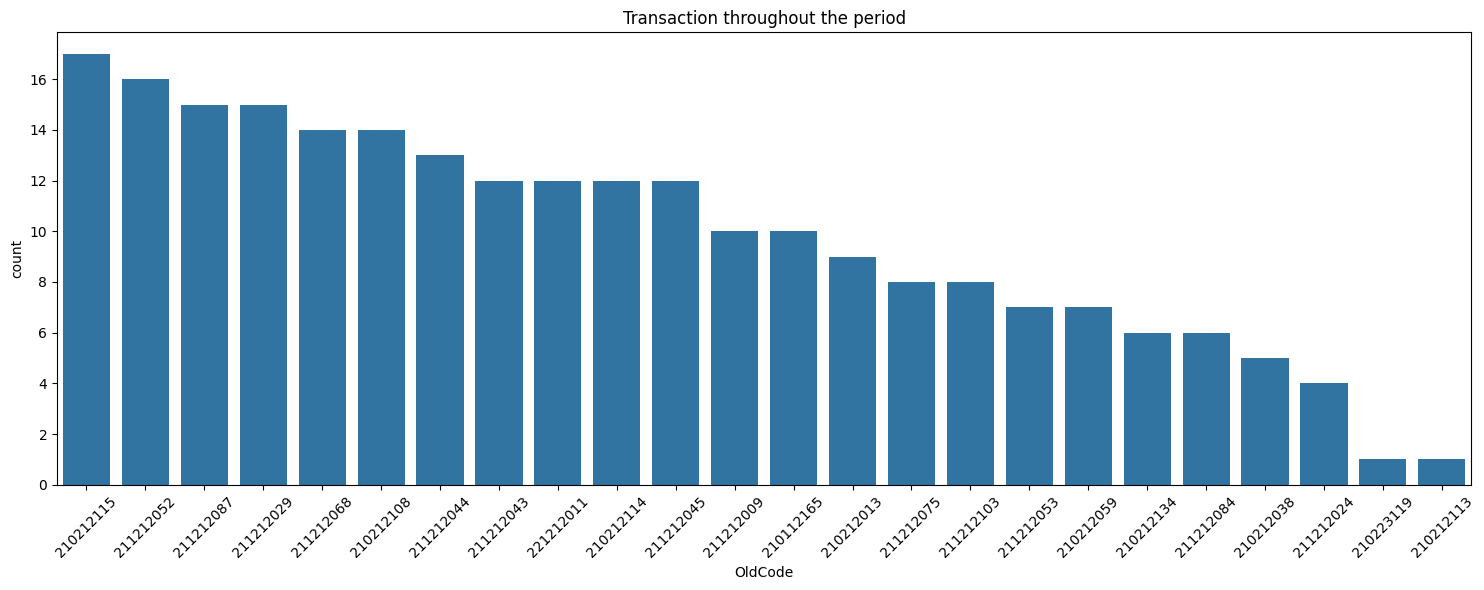

In [20]:
# Plot with ordered OldCode
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.countplot(data=new_df, x='OldCode', order=ordered_codes)

plt.title('Transaction throughout the period')
plt.tight_layout()
plt.show()


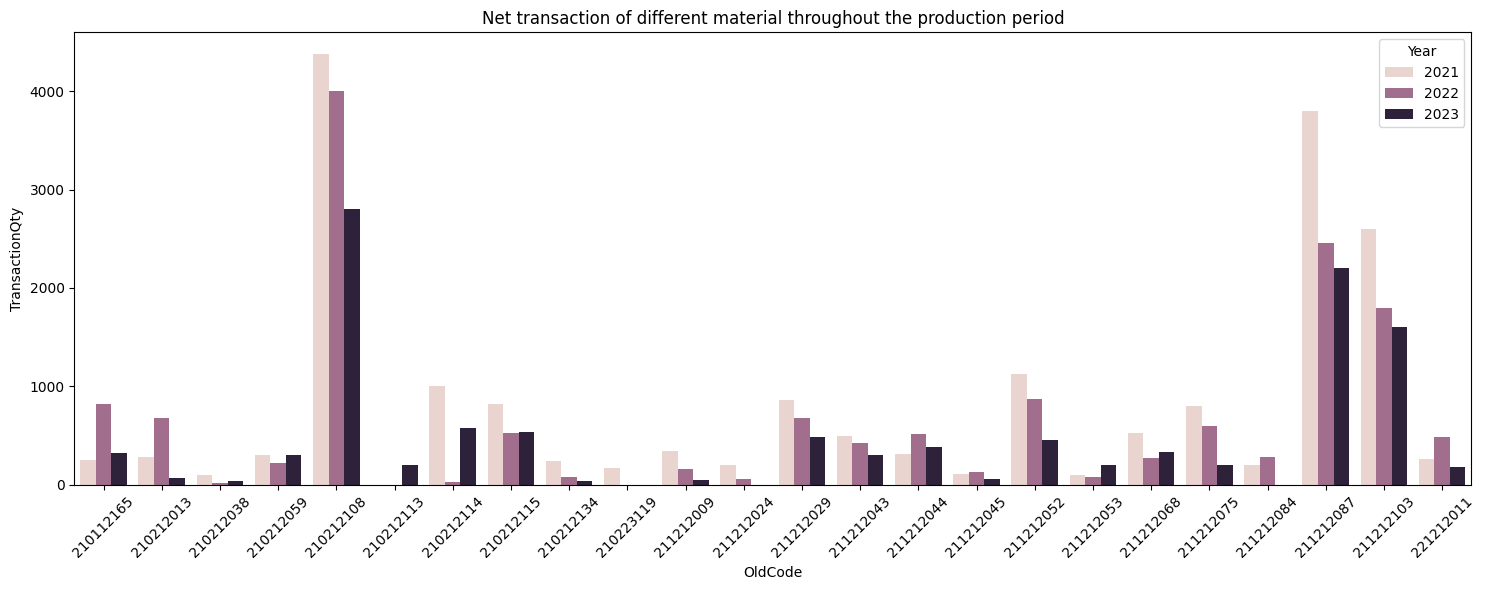

In [21]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.barplot(group_year , x = 'OldCode' , y='TransactionQty', hue = 'Year')

plt.title('Net transaction of different material throughout the production period')
plt.tight_layout()
plt.show()

# group_year['OldCode'].nunique()

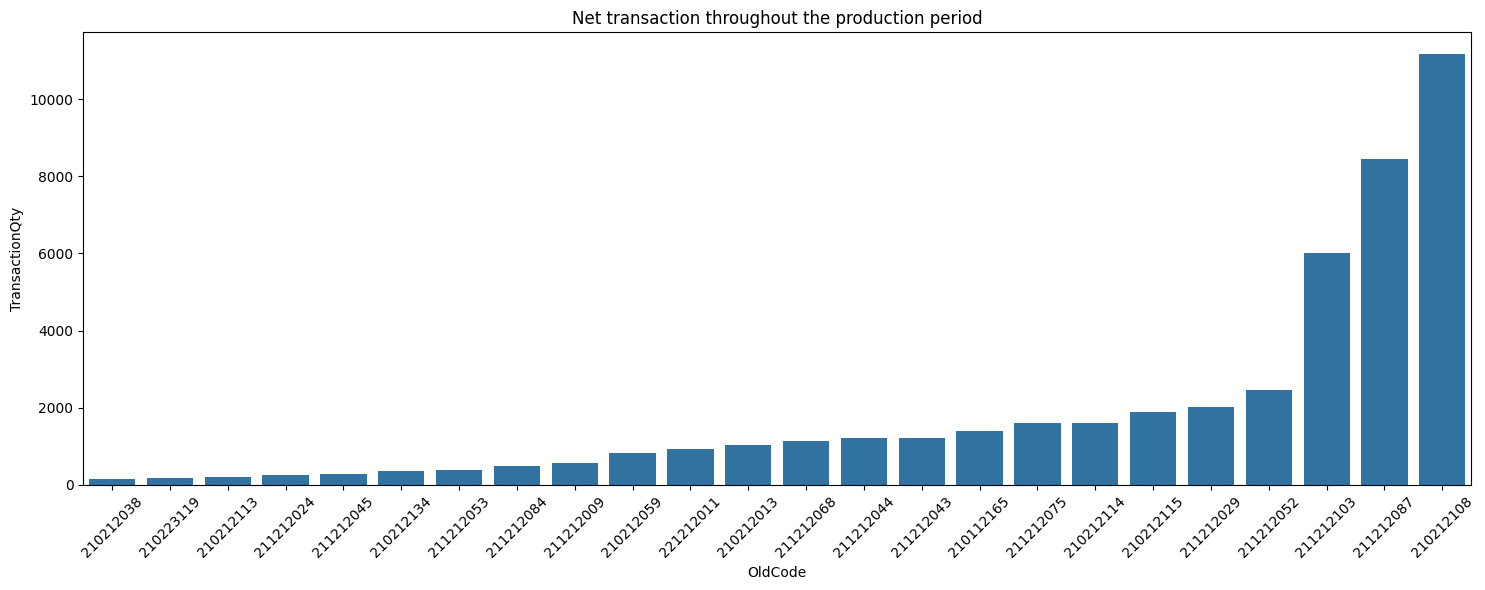

In [22]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.barplot(data = group , x = 'OldCode' , y='TransactionQty' , order = group['OldCode'])

plt.title('Net transaction throughout the production period')
plt.tight_layout()
plt.show()



# sns.barplot(df.groupby(['OldCode','Description'])['TransactionQty'].sum().reset_index() , x = 'OldCode' , y = 'TransactionQty')

# **Creating MRP**

In [22]:
# listing item description or material id

pd.set_option('display.max_rows', None)  # None means unlimited

# Print the entire DataFrame
display(group[['OldCode', 'Description']].reset_index(drop=True))

# print(df[['OldCode', 'Description']].drop_duplicates().reset_index(drop=True))

,OldCode,Description
0,210212038,Fluorinert Electronic Liquid 3M P/N 26/:FC-770
1,210223119,Fluid Syltherm for Chiller (P/N : 2888181 SPTS)
2,210212113,ELM-C-30T02 or ELM C30
3,211212024,Hydrogen Peroxide (VLSI Grade)
4,211212045,ISO-PROPYL ALCOHOL
5,210212134,Hydrogen per oxide 30% (20 Liters packing)
6,211212053,Mixed Nitric HF (HF + HNO3)
7,211212084,Stripper EKC-265
8,211212009,ACID SULPHURIC VLSI GRADE
9,210212059,PHOSPHORIC ACID 85%


In [ ]:
input_material_id = int(input('\nEnter the old code of material from above list for which you want to see the data : '))

material_table = new_df[new_df['OldCode'] == input_material_id]
material_table.sort_values(by = ['Year' , 'Month'])

print('\nMaterial transaction in the production period : \n')
display(material_table)


In [63]:
# creates a pivot table showing all the transaction in year and month

pivot_table = material_table.pivot_table(values = "TransactionQty" , index = "Month" , columns = "Year").fillna(0)
print(f"\nTransaction Table for item code {input_material_id} and item name {material_table['Description'].unique()}\n")
display(pivot_table)


Transaction Table for item code 210212108 and item name ['Hydrogen Peroxide GB 30%']



Year,2021,2022,2023
Month,,,
1,0.0,800.0,1200.0
2,0.0,0.0,800.0
3,0.0,0.0,800.0
6,580.0,0.0,0.0
7,1600.0,800.0,0.0
8,800.0,0.0,0.0
9,800.0,0.0,0.0
10,400.0,800.0,0.0
11,0.0,800.0,0.0


## **creating function to update table**

In [64]:
def create_new_col(data):
    n=1
    for i , quarter in enumerate(data.columns) :
        new_columns = []

        if i > 0 :

            data.loc[0,quarter] = demand

            if(quarter == 'quarter1'):
              data.loc[1 , 'quarter1'] = beg_inventory_q1

            quarter = 'quarter' + str(i - lead_time)
            if quarter not in data.columns and quarter not in new_columns:
                  data.insert(n, quarter, 0)  # Insert new column at index 1
                  new_columns.append(quarter)  # Track newly inserted column
                  n+=1

    data.loc[2,'quarter0'] = data.loc[1,'quarter1']

    return data

def update_table(data):  # Track recursion depth

    for i,  quarter in enumerate(data.columns):
        if lead_time < i < len(data.columns) :

            prev_quarter = 'quarter' + str(i -lead_time - 1)
            prev_por_colmn = 'quarter' + str(i - 2*lead_time )

            # update beg inventory
            if prev_quarter in data.columns:
              data.loc[1,quarter] = data.loc[2,prev_quarter] + data.loc[3, prev_por_colmn]

            # update end inventory
            data.loc[2,quarter] = float(data.loc[1,quarter]) - float(data.loc[0,quarter])
            if float(data.loc[2,quarter]) < safety_stock :
              data.loc[3,prev_por_colmn] = por_value
              data.loc[1,quarter] = data.loc[2,prev_quarter] + data.loc[3, prev_por_colmn]
              data.loc[2,quarter] = float(data.loc[1,quarter]) - float(data.loc[0,quarter])
              # update(data)



    return data




### **Creating the mrp table**

In [65]:


data = {
    'Period' : ['Demand' , 'Beg. Inventory' , 'End. Inventory' , 'P.O.R'],
    'quarter1' : [0,0,0,0],
    'quarter2' : [0,0,0,0],
    'quarter3' : [0,0,0,0],
    'quarter4' : [0,0,0,0]

}

mrp_table = pd.DataFrame(data)
print("Sample MRP table")
display(mrp_table)

Sample MRP table


,Period,quarter1,quarter2,quarter3,quarter4
0,Demand,0,0,0,0
1,Beg. Inventory,0,0,0,0
2,End. Inventory,0,0,0,0
3,P.O.R,0,0,0,0


In [66]:
# taking required inputs

n = int(input('Please enter the highest number of transaction you want to use : '))
print(f"\nTop {n} transaction are following \n")

display(material_table.nlargest(n, 'TransactionQty').reset_index(drop = True))

monthly_usage = material_table.nlargest(n, 'TransactionQty')['TransactionQty'].mean()

print(monthly_usage)

Please enter the highest number of transaction you want to use :  3



Top 3 transaction are following 



,OldCode,Description,Year,Month,TransactionQty
0,210212108,Hydrogen Peroxide GB 30%,2021,7,1600
1,210212108,Hydrogen Peroxide GB 30%,2023,1,1200
2,210212108,Hydrogen Peroxide GB 30%,2022,12,800


1200.0


In [67]:
# taking required inputs

demand_multiple_input = float(input('\nEnter the number your want your demand to be the multiple of monthly usage : '))
beg_invent_input = float(input('\nEnter the number your want your beg inventory in 1st quarter to be the multiple of monthly usage : '))
lotSize_input = float(input('\nEnter the number your want your lot size to be the multiple of monthly usage : '))
safety_stock_input = float(input('\nEnter the number you want your safety stock to be the multiple of monthly usage : '))
lead_time = int(input('\nEnter the lead time in quarters : '))



Enter the number your want your demand to be the multiple of monthly usage :  3

Enter the number your want your beg inventory in 1st quarter to be the multiple of monthly usage :  4

Enter the number your want your lot size to be the multiple of monthly usage :  3

Enter the number you want your safety stock to be the multiple of monthly usage :  2

Enter the lead time in quarters :  2


In [68]:
# creating all the parameters
demand = demand_multiple_input * monthly_usage
beg_inventory_q1 = beg_invent_input * monthly_usage
por_value = lotSize_input * monthly_usage
safety_stock = safety_stock_input * monthly_usage


In [69]:
# updating the mrp table

In [70]:
mrp_table = create_new_col(mrp_table)
display(mrp_table)
print('monthly_usage : ', monthly_usage )
print('lead_time : ',lead_time)
print('safety_stock : ' ,safety_stock,'\n')

mrp_table = update_table(mrp_table)
display(mrp_table)
print('monthly_usage : ', monthly_usage )
print('lead_time : ',lead_time)
print('safety_stock : ' ,safety_stock,'\n')

,Period,quarter-1,quarter0,quarter1,quarter2,quarter3,quarter4
0,Demand,0,0,3600,3600,3600,3600
1,Beg. Inventory,0,0,4800,0,0,0
2,End. Inventory,0,4800,0,0,0,0
3,P.O.R,0,0,0,0,0,0


monthly_usage :  1200.0
lead_time :  2
safety_stock :  2400.0 



,Period,quarter-1,quarter0,quarter1,quarter2,quarter3,quarter4
0,Demand,0,0,3600,3600,3600,3600
1,Beg. Inventory,0,0,8400,8400,8400,8400
2,End. Inventory,0,4800,4800,4800,4800,4800
3,P.O.R,3600,3600,3600,3600,0,0


monthly_usage :  1200.0
lead_time :  2
safety_stock :  2400.0 



In [71]:
new_table = mrp_table.set_index('Period')
new_table = new_table.transpose()
print(tabulate(new_table, headers = 'keys', tablefmt = 'psql'))
print('monthly_usage : ', monthly_usage ,'\n')
print('lead_time : ',lead_time)
print('safety_stock : ' ,safety_stock,'\n')

+-----------+----------+------------------+------------------+---------+
|           |   Demand |   Beg. Inventory |   End. Inventory |   P.O.R |
|-----------+----------+------------------+------------------+---------|
| quarter-1 |        0 |                0 |                0 |    3600 |
| quarter0  |        0 |                0 |             4800 |    3600 |
| quarter1  |     3600 |             8400 |             4800 |    3600 |
| quarter2  |     3600 |             8400 |             4800 |    3600 |
| quarter3  |     3600 |             8400 |             4800 |       0 |
| quarter4  |     3600 |             8400 |             4800 |       0 |
+-----------+----------+------------------+------------------+---------+
monthly_usage :  1200.0 

lead_time :  2
safety_stock :  2400.0 



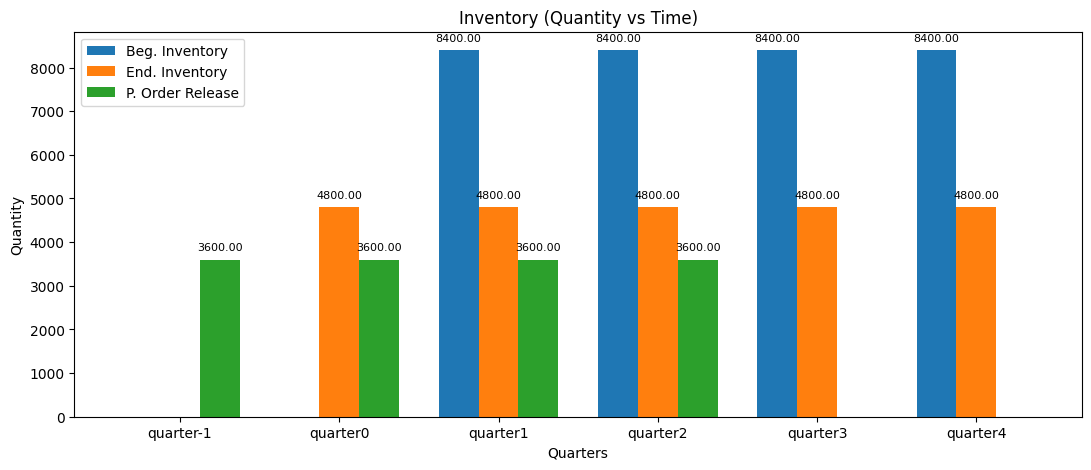

In [72]:


# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(13, 5))

# Define bar width and positions
bar_width = 0.25
index = np.arange(len(new_table))

# Plot each category of data
bar1 = plt.bar(index - bar_width, new_table['Beg. Inventory'], bar_width, label='Beg. Inventory')
bar2 = plt.bar(index, new_table['End. Inventory'], bar_width, label='End. Inventory')
bar3 = plt.bar(index + bar_width, new_table['P.O.R'], bar_width, label='P. Order Release')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height != 0:
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)  # Reduced font size for better fit

add_labels(bar2)
add_labels(bar1)
add_labels(bar3)


# Add labels, title, and legend
plt.xlabel('Quarters')
plt.ylabel('Quantity')
plt.title('Inventory (Quantity vs Time)')
plt.xticks(index, new_table.index)
plt.legend()
plt.savefig('inventory_plot.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

In [73]:
# round(float(input('please enter a number')),2)